# **SDS-CP023-Diamond Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?
To build a model that will predict the price of diamond based on the following features/attributes - carat, cut, color, clarity, depth, and dimensions. 

### **The objective:**

 - What is the intended goal?
To predict price that matches the actual price 95% of the time.

### **The key questions:**

- What are the key questions that need to be answered?
1. 
2. 


## **Data Description:**



* **Price:** cost of diamond in US dollars $

* **carat:** weight of the diamond

* **cut:** represents the 'shine' with the following categories: ideal, premium, good, very good and fair

* **color:** the color is for visual appeal. Values range from D to J. 

* **clarity:** explains the internal diamond purity with these classifications - SI2 SI1 VS1 VS2 VVS2 VVS1 and I1.

* **depth:** represents the diamond depth percentage

* **table:** measure of flatness at the top

* **dimensions:** different measurements from the flat surface - x = width, y = length, z = height


### **Import the necessary libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### **Read the dataset**

In [6]:
diamdata=pd.read_csv("C:/Users/adann/Desktop/gitDocuments/sds_diamond_beginner_project/type of the Diamond new.csv")

In [7]:
# Copying data to another variable to avoid any changes to original data
data=diamdata.copy()

### **Print the first and last 5 rows of the dataset**

In [60]:
# Display first five rows

data.head()

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
0,Fair,E,VS2,0.22,65.1,61.0,337,3.87,2.49,3.78
1,Fair,E,SI2,0.86,55.1,69.0,2757,6.45,3.52,6.33
2,Fair,F,SI2,0.96,66.3,62.0,2759,6.27,4.07,5.95
3,Fair,F,VS2,0.70,64.5,57.0,2762,5.57,3.58,5.53
4,Fair,F,VS2,0.70,65.3,55.0,2762,5.63,3.66,5.58


In [61]:
# Display last 5 rows
data.tail()

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
53935,Very Good,E,VS2,0.7,62.8,60.0,2755,5.59,3.53,5.65
53936,Very Good,D,VS1,0.7,63.1,59.0,2755,5.67,3.55,5.58
53937,Very Good,E,VS2,0.7,60.5,59.0,2757,5.71,3.47,5.76
53938,Very Good,E,VS2,0.7,61.2,59.0,2757,5.69,3.49,5.72
53939,Very Good,D,SI1,0.7,62.8,60.0,2757,5.66,3.56,5.68


### **Understand the shape of the dataset**

In [62]:
# Check the shape of the data

data.shape

(53940, 10)

**Insights __::**
- The data contains **53,940 observations and 10 columns**.

### **Check the data types of the columns**

In [63]:
# Check info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cut            53940 non-null  object 
 1   color          53940 non-null  object 
 2   clarity        53940 non-null  object 
 3   carat          53940 non-null  float64
 4   depth          53940 non-null  float64
 5   table          53940 non-null  float64
 6   price          53940 non-null  int64  
 7   x (Premium)    53940 non-null  float64
 8   z (Very Good)  53940 non-null  float64
 9   y (Good)       53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


**Insights ______________**
- There are no missing values for any of the observations and columns. 
- There are only three categorical variables, the rest are numerical.

### **Check for missing values**

In [64]:
# Analyse missing values - Hint: use isnull() function
data.isnull().sum()

cut              0
color            0
clarity          0
carat            0
depth            0
table            0
price            0
x (Premium)      0
z (Very Good)    0
y (Good)         0
dtype: int64

In [65]:
# Check the percentage of missing values in the each column.
# Hint: divide the result from the previous code by the number of rows in the dataset

data.isnull().sum()/data.shape[0]

cut              0.0
color            0.0
clarity          0.0
carat            0.0
depth            0.0
table            0.0
price            0.0
x (Premium)      0.0
z (Very Good)    0.0
y (Good)         0.0
dtype: float64

**The percentage of missing values is 0% for all variables/columns.**

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types???**

In [66]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical


In [67]:
cols

['cut', 'color', 'clarity']

In [68]:
# Changing the data type of object type column to category. hint use astype() function

for i in cols:
    data[i] = data[i].astype("category")

In [69]:
# Checking the info again and the datatype of different variable

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   cut            53940 non-null  category
 1   color          53940 non-null  category
 2   clarity        53940 non-null  category
 3   carat          53940 non-null  float64 
 4   depth          53940 non-null  float64 
 5   table          53940 non-null  float64 
 6   price          53940 non-null  int64   
 7   x (Premium)    53940 non-null  float64 
 8   z (Very Good)  53940 non-null  float64 
 9   y (Good)       53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [70]:
Q1= np.percentile(data["price"], 25)
print(Q1)

950.0


### **Analyze Summary Statistics of the dataset**

In [71]:
# Analyze the summary statistics for numerical variables

data.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x (Premium),53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
z (Very Good),53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80
y (Good),53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90


In [72]:
#Categorize the features by type:
numerical_features = ['carat', 'depth', 'table', 'price', 'x (Premium)', 'z (Very Good)', 'y (Good)']
categorical_features = ['cut', 'color', 'clarity']

**Observations**

- Average carat is .798, maximum is 5.01. Minimum is 0.2.  
- For the depth, the average is 61.7, max is 79 with a std dev of 1.43. 
- The table measurements are close, ranging from minimum of 43 to max of 95. Average is 57.
- Price is the target dependent variable we need to predict. It has a high standard deviation indicating high variance meaning a lot of the diamond rings are highly expensive. Minimum price is 326, ranging up to a maximum of 18000. 50% of the diamonds cost $2,400.
- Max or oldest CLAGE is 1168. Average age is 175 while std dev is 85.
 - For the dimension, the Premium (x = width) has the lowest maximum among the 3 dimensions.


In [73]:
# Check summary for categorical data.

data.describe(include = "category").T

,count,unique,top,freq
cut,53940,5,Ideal,21551
color,53940,7,G,11292
clarity,53940,8,SI1,13065


**Insights**

- This table lists the hightest categories among the categorical variables.
- The hightest cut/shine is the "Ideal" option.
- The predominant color is "G".
- The highest clarity, indicating diamond purity is Sl1.

**Let's look at the unique values in all the categorical variables**

In [74]:
# Checking the count of unique values in each categorical column 

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].nunique(dropna = False))
    print('*'*40)

Unique values in cut are :
5
****************************************
Unique values in color are :
7
****************************************
Unique values in clarity are :
8
****************************************


### **Think about it**
- The results above gave the absolute count of unique values in each categorical column. Are absolute values a good measure? 
- If not, what else can be used? Try implementing that. 

In [75]:
#To print the actual unique values..

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts(dropna = False))
    print('*'*40)

Unique values in cut are :
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
****************************************
Unique values in color are :
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
****************************************
Unique values in clarity are :
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64
****************************************


**Insights**
- Printing the unique values in each category reveals there is noblank values "NaN".
- There is no need to replace any blank value with median if distribution is skewed or with mean if normal distribution.

In [76]:
#To print the actual % of unique values..

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts(dropna = False))
    print('Percentag of unique values in',i, 'are :')
    print(data[i].value_counts(dropna = False)/data[i].shape[0])
    print('*'*40)

Unique values in cut are :
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
Percentag of unique values in cut are :
cut
Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Good         0.090953
Fair         0.029848
Name: count, dtype: float64
****************************************
Unique values in color are :
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
Percentag of unique values in color are :
color
G    0.209344
E    0.181628
F    0.176900
H    0.153949
D    0.125603
I    0.100519
J    0.052058
Name: count, dtype: float64
****************************************
Unique values in clarity are :
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64
Percentag of unique values in clarity are :
clarity
SI1     0.242214
VS2     0.227253
SI2     0

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

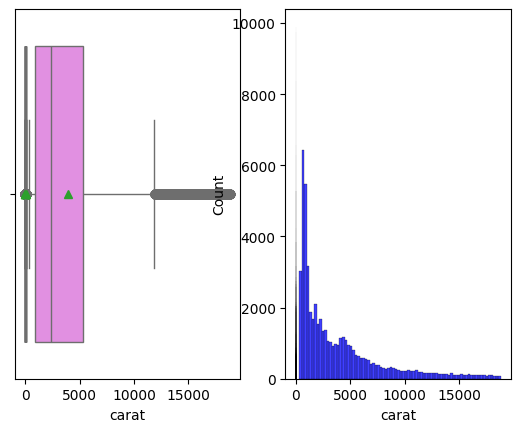

In [140]:
#plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features): #[:6], 1):
    plt.subplot(121)
    sns.boxplot(x = data[feature], showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    plt.subplot(122)
    sns.histplot(x = data[feature], kde=False, color="blue") #, gridspec_kw = {"height_ratios": (.25, .75)}) if bins else sns.histplot(x = data['carat'], kde=False) # For histogram
#    plt.title(f'{feature} Distribution') #palette="winter"
#plt.tight_layout()
plt.show()
#ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
   # ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for PRICE

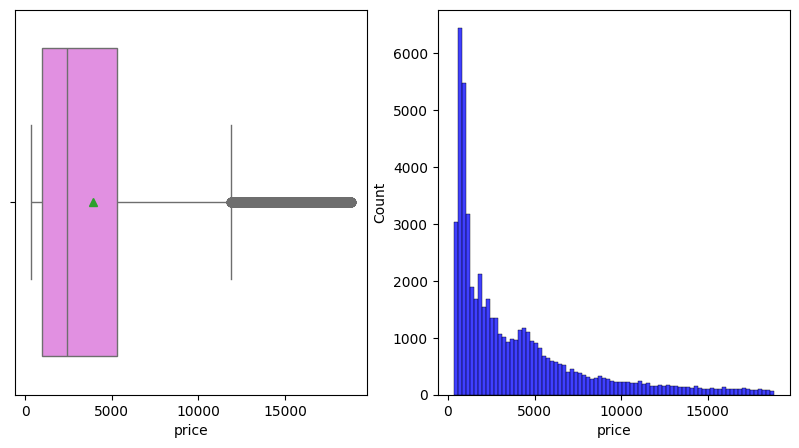

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.boxplot(x = data['price'], showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
plt.subplot(122)
sns.histplot(x = data['price'], kde=False, color="blue") #, gridspec_kw = {"height_ratios": (.25, .75)}) if bins else sns.histplot(x = data['carat'], kde=False) # For histogram
#    plt.title(f'{feature} Distribution') #palette="winter"
#plt.tight_layout()
plt.show()

**Insights**
- Average price is ~3900. Based on the 25% and 75% IQR indicates that half the people/50% of the price paid is between $1000 - 5000. The outliers are greater than $10,000. The distribution is left-skewed showing that the price of most rings bought are 5000 or less.

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

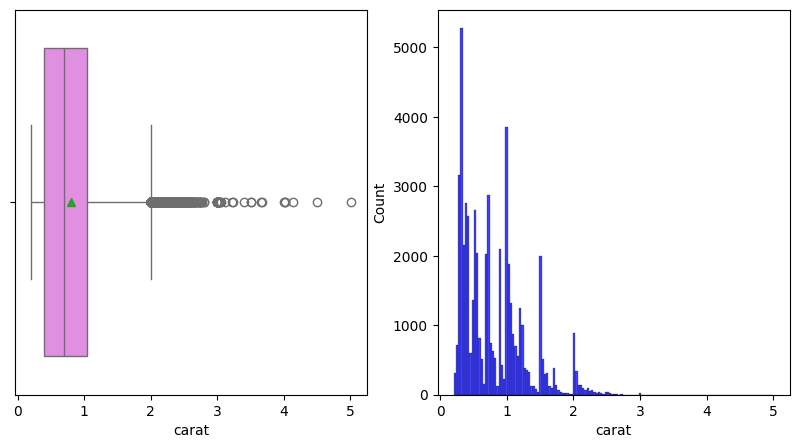

In [12]:
# Build the histogram boxplot for carat
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.boxplot(x = data['carat'], showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
plt.subplot(122)
sns.histplot(x = data['carat'], kde=False, color="blue") #, gridspec_kw = {"height_ratios": (.25, .75)}) if bins else sns.histplot(x = data['carat'], kde=False) # For histogram
#    plt.title(f'{feature} Distribution') #palette="winter"
#plt.tight_layout()
plt.show()

**Insights**
- The average carat made/bought is less than 1 carat and is higher than the median of .7.

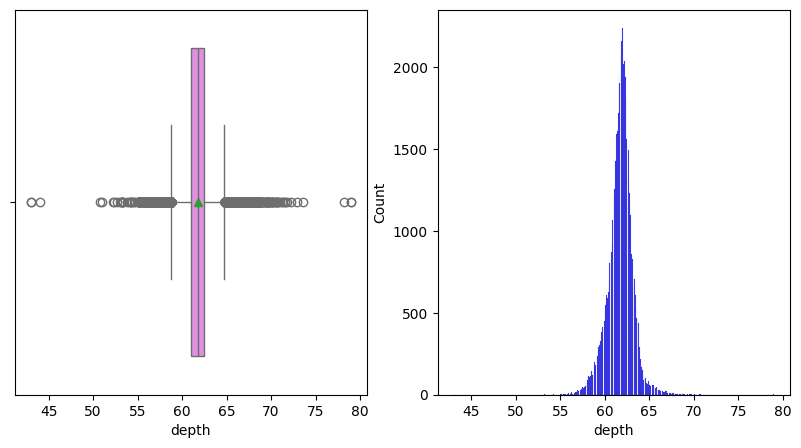

In [13]:
# Build the histogram boxplot for VALUE
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.boxplot(x = data['depth'], showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
plt.subplot(122)
sns.histplot(x = data['depth'], kde=False, color="blue") #, gridspec_kw = {"height_ratios": (.25, .75)}) if bins else sns.histplot(x = data['carat'], kde=False) # For histogram
#    plt.title(f'{feature} Distribution') #palette="winter"
#plt.tight_layout()
plt.show()

**Insights**
- The depthn follows a normal distribution.
- The median and mean seem equal.

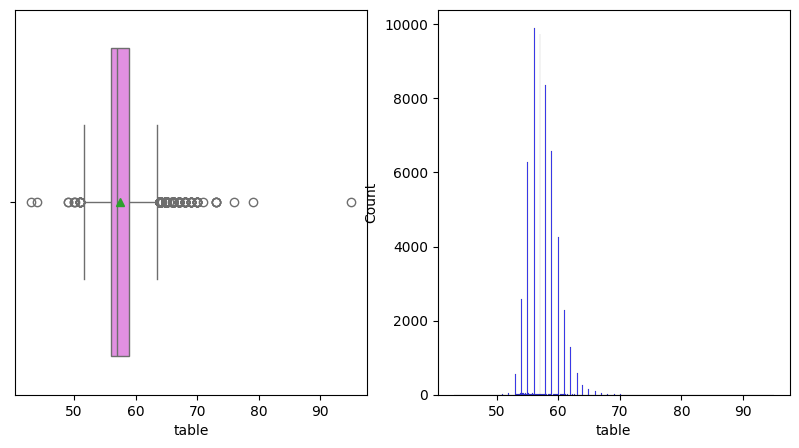

In [14]:
# Build the histogram boxplot for YOJ
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.boxplot(x = data['table'], showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
plt.subplot(122)
sns.histplot(x = data['table'], kde=False, color="blue") #, gridspec_kw = {"height_ratios": (.25, .75)}) if bins else sns.histplot(x = data['carat'], kde=False) # For histogram
#    plt.title(f'{feature} Distribution') #palette="winter"
#plt.tight_layout()
plt.show()

**Observations**
- The table follows a normal spread as well but slightly left-skewed.loyed) varies from 0 to 38 years.
                                                                         

### **2. Univariate Analysis - Categorical Data**

#### Analyze Barplot for DELINQ

C:\Users\adann\AppData\Local\Temp\ipykernel_17716\3676286955.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data["cut"],palette='winter')


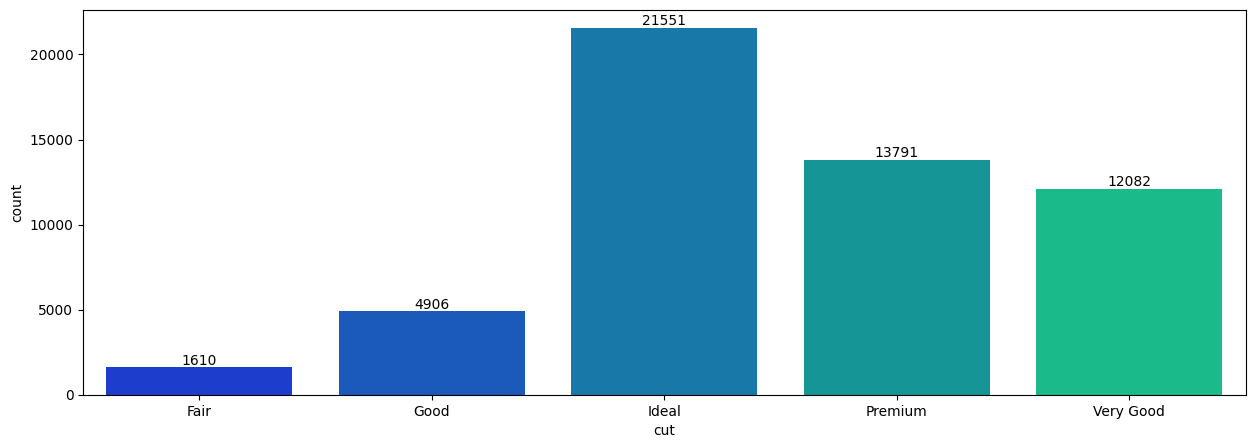

In [15]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["cut"],palette='winter')
#perc_on_bar(ax,data["cut"])
for container in ax.containers:
    ax.bar_label(container)

**Insights**
- 40% of the cuts are the Ideal brand, followed by Premium.

#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

C:\Users\adann\AppData\Local\Temp\ipykernel_17716\3538385892.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data["color"],palette='winter')


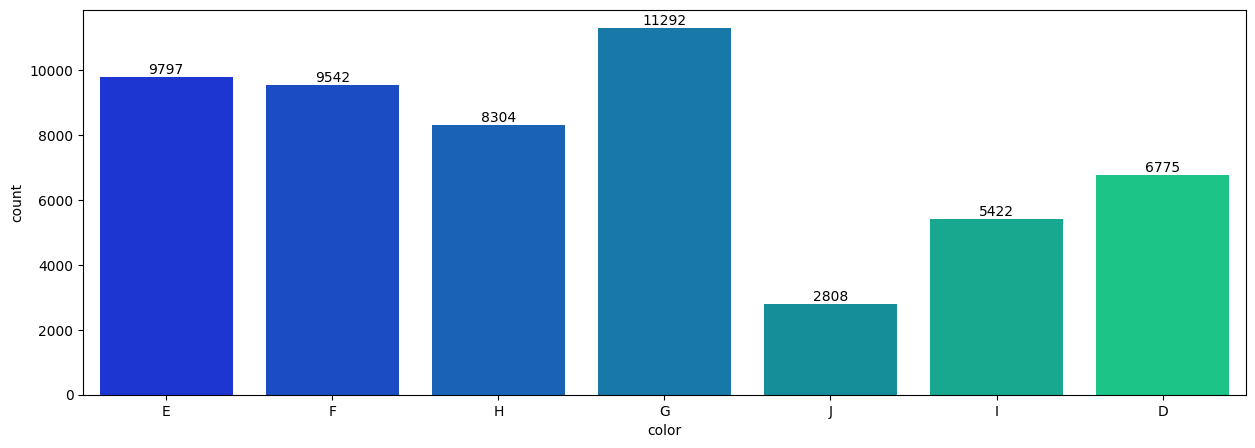

In [16]:
#Build barplot for NINQ #CLAGE did not display correctly

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["color"],palette='winter')
for container in ax.containers:
    ax.bar_label(container)

**Insights**
- The preferred color based on the distribution is color G.
- This is followed by color E then F.

C:\Users\adann\AppData\Local\Temp\ipykernel_17716\3489206348.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data["clarity"],palette='winter')


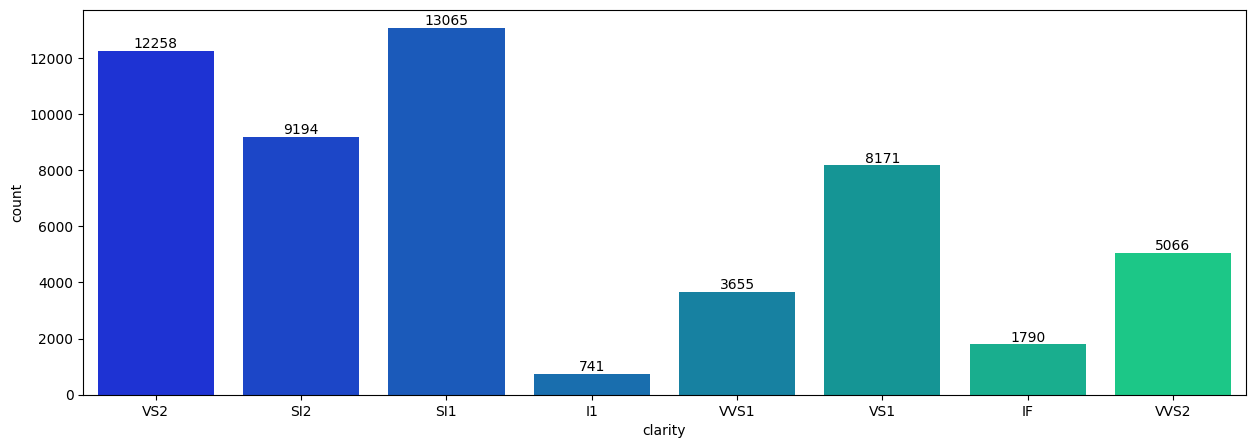

In [17]:
#Build barplot for CLNO

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["clarity"],palette='winter')
for container in ax.containers:
    ax.bar_label(container)

**Insights**
- Sl1 and VS2 are the most sold purity level.

## **Bivariate Analysis**

### **Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

C:\Users\adann\AppData\Local\Temp\ipykernel_8460\2097004802.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["price"],y=data['clarity'],palette="PuBu")


<Axes: xlabel='price', ylabel='clarity'>

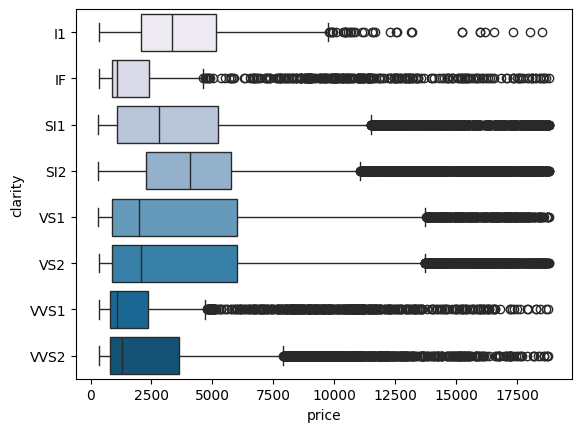

In [30]:
sns.boxplot(x=data["price"],y=data['clarity'],palette="PuBu")

**Insights**
- The price is not determined by clarity.
- Each clarity can have a high-ranged price.

#### 

#### **Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

C:\Users\adann\AppData\Local\Temp\ipykernel_8460\2542826699.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["price"],y=data['cut'],palette="PuBu")


<Axes: xlabel='price', ylabel='cut'>

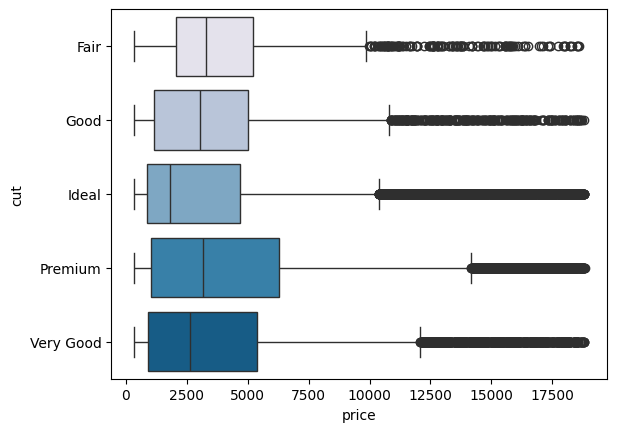

In [31]:
sns.boxplot(x=data["price"],y=data['cut'],palette="PuBu")

**Insights**
- There is a bigger range of 50% of the people that purchase the Premium brand which has a much higher outlier price compared to the other cuts...

### **Bivariate Analysis: Two Continuous Variables**

In [ ]:
sns.scatterplot(x = data["price"], y = data['carat'],palette="PuBu")
#sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = train_df, ax = axes[1]);

**Observation**
- The scatterplot shows better separation of the outlier values for both the price and carats.

In [ ]:
sns.scatterplot(x = data["table"], y = data['depth'],palette="PuBu")

**Insights: _____**

C:\Users\adann\AppData\Local\Temp\ipykernel_8460\4291445084.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = data["price"], y = data['depth'],palette="PuBu")


<Axes: xlabel='price', ylabel='depth'>

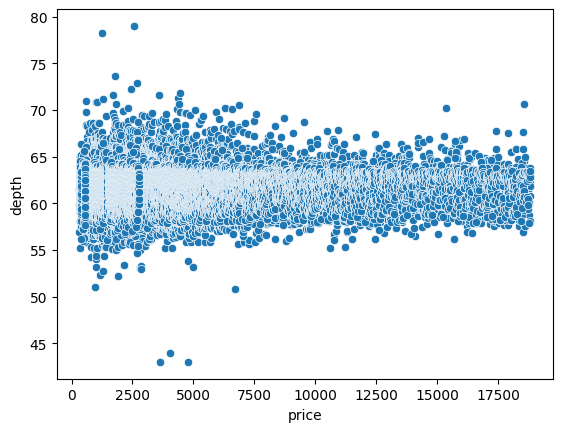

In [33]:
#loAN AND MORTDUE AND lOAN AND YOJ ARE NOT CORRELATED
sns.scatterplot(x = data["price"], y = data['depth'],palette="PuBu")

C:\Users\adann\AppData\Local\Temp\ipykernel_8460\22036741.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = data["price"], y = data['clarity'],palette="PuBu")


<Axes: xlabel='price', ylabel='clarity'>

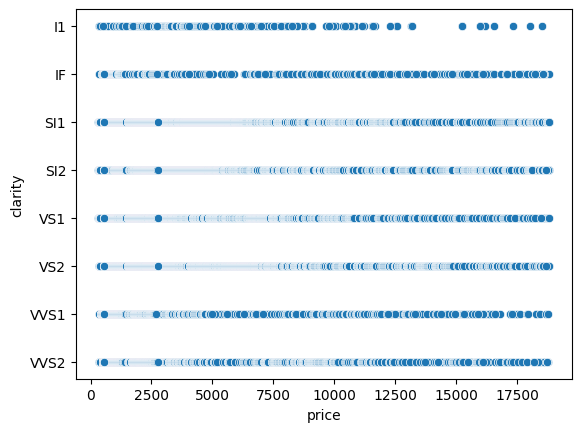

In [34]:
sns.scatterplot(x = data["price"], y = data['clarity'],palette="PuBu")

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

### **Multivariate Analysis**

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   cut            53940 non-null  category
 1   color          53940 non-null  category
 2   clarity        53940 non-null  category
 3   carat          53940 non-null  float64 
 4   depth          53940 non-null  float64 
 5   table          53940 non-null  float64 
 6   price          53940 non-null  int64   
 7   x (Premium)    53940 non-null  float64 
 8   z (Very Good)  53940 non-null  float64 
 9   y (Good)       53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


#### Add hist and boxplot chart for all Numerical Variables

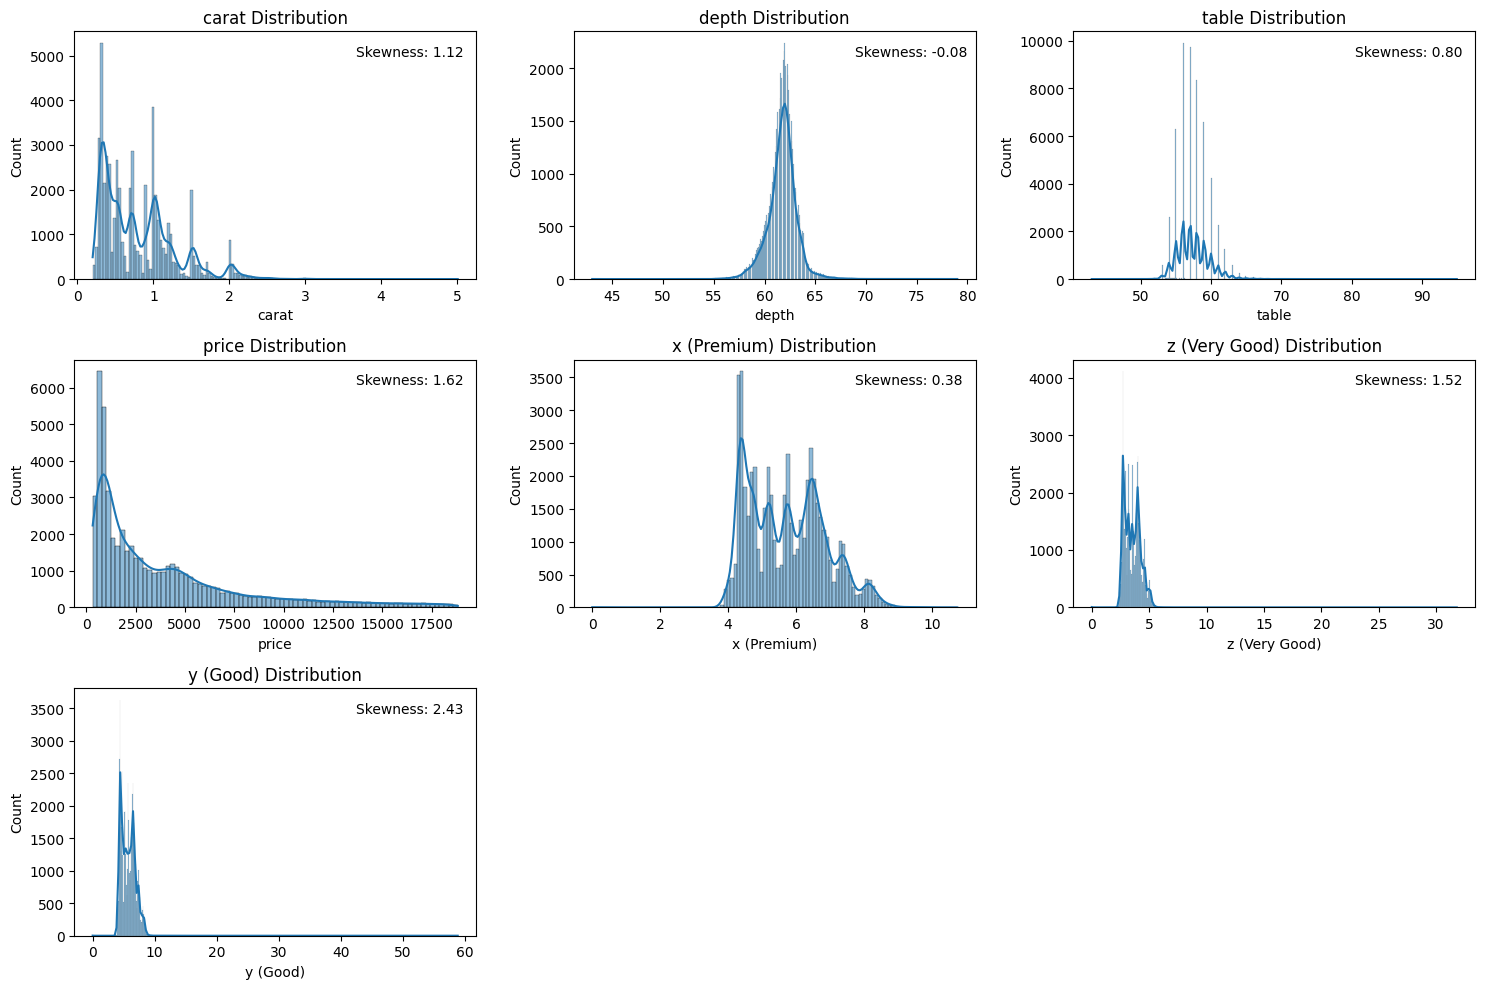

In [47]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features[:7], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'{feature} Distribution')
    skewness = stats.skew(data[feature].dropna())
    plt.text(0.7, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

#### Histplot after removal of outliers

In [81]:
data_cln = data.copy() #make a copy of the current dataframe
data_clncap = data.copy() #to observer capped plots as described in the video

In [90]:
 Q1= np.percentile(data[numerical_features], 25) # 25th quantile
 Q3= np.percentile(data[numerical_features], 75)  # 75th quantile
 IQR=Q3 - Q1   # IQR Range
 Lower_Whisker = Q1 - (1.5 * IQR)  #define lower whisker
 Upper_Whisker = Q3 + (1.5 * IQR)  # define upper Whisker
 data_cln[numerical_features] = np.clip(data[numerical_features], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
 #data_clncap.loc[data_clncap['carat'] > Upper_Whisker, 'carat'] = Upper_Whisker
 #data_clncap.loc[data_clncap[numerical_features] < Lower_Whisker, numerical_features] = Lower_Whisker
#data_cln.loc[data_cln[co

C:\Users\adann\AppData\Local\Temp\ipykernel_8460\3885942951.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = stats.skew(data_clncap[feature].dropna())


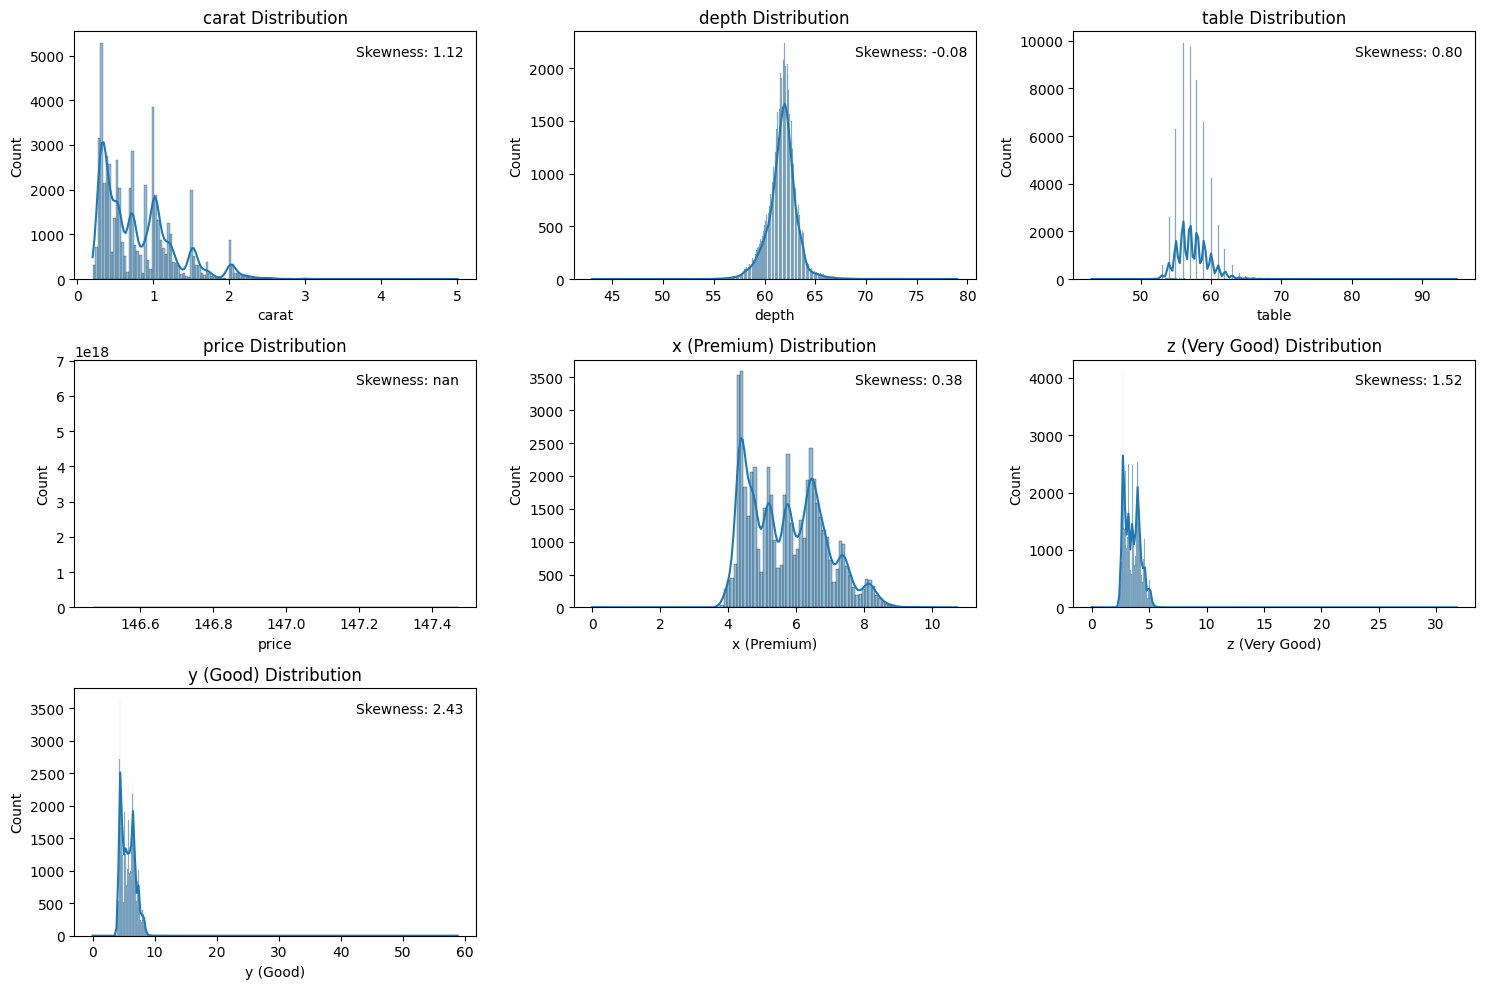

In [91]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features[:7], 1):
    data_clncap.loc[data_clncap[feature] > Upper_Whisker, feature] = Upper_Whisker
    data_clncap.loc[data_clncap[feature] < Lower_Whisker, feature] = Lower_Whisker
    plt.subplot(3, 3, i)
    sns.histplot(data_clncap[feature], kde=True)
    plt.title(f'{feature} Distribution')
    skewness = stats.skew(data_clncap[feature].dropna())
    plt.text(0.7, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

C:\Users\adann\AppData\Local\Temp\ipykernel_8460\3817525405.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = stats.skew(data_cln[feature].dropna())


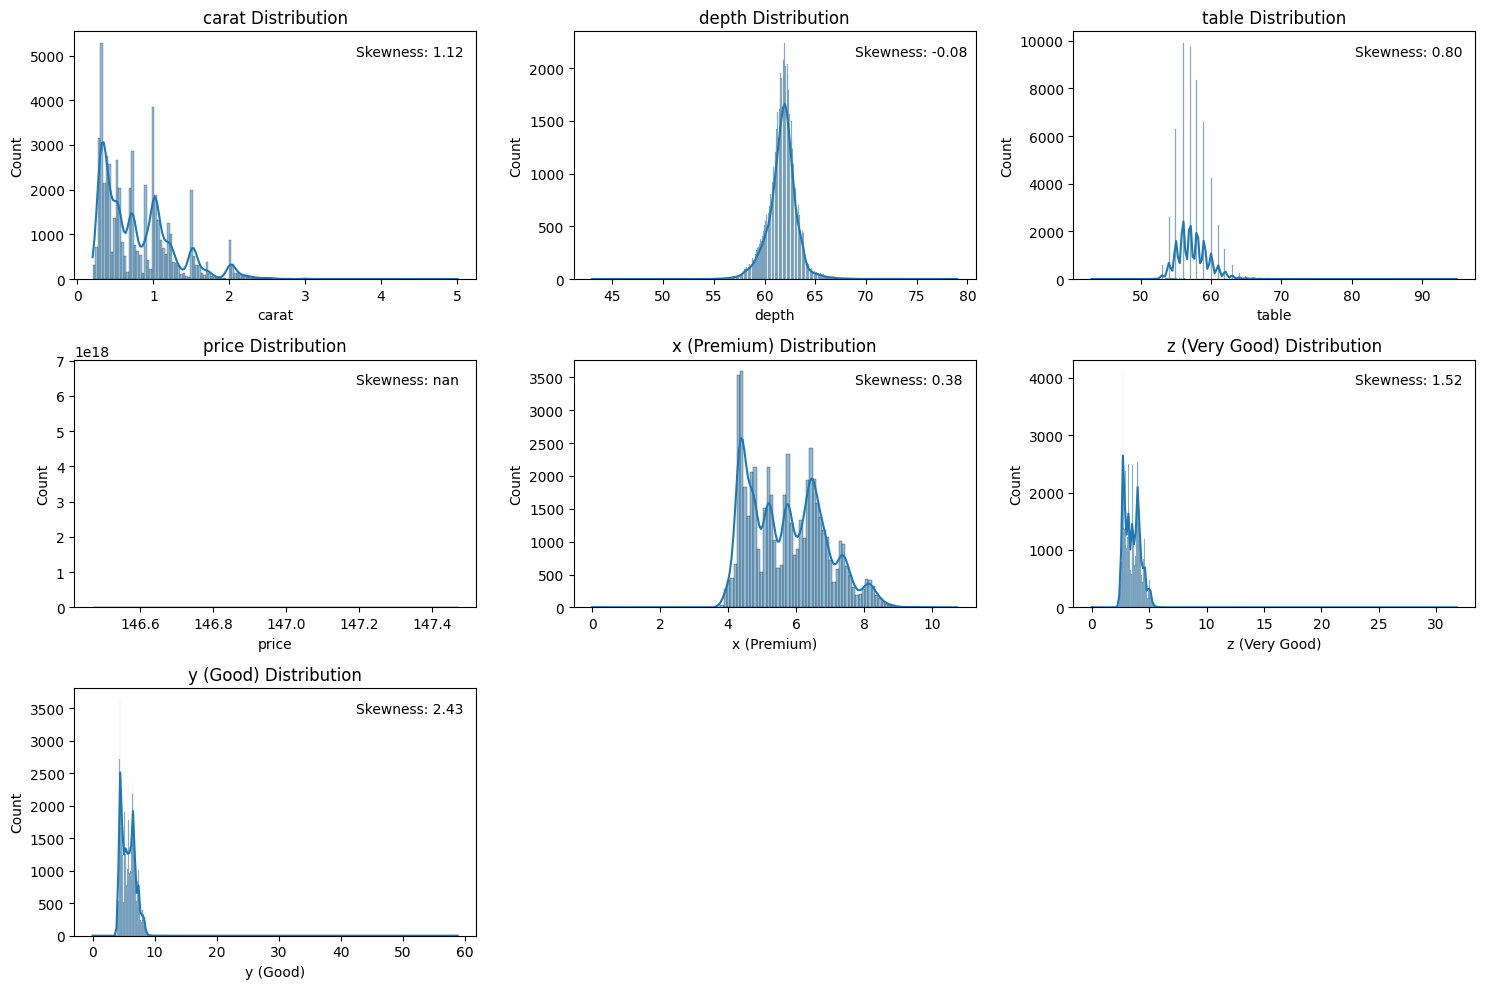

In [92]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features[:7], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data_cln[feature], kde=True)
    plt.title(f'{feature} Distribution')
    skewness = stats.skew(data_cln[feature].dropna())
    plt.text(0.7, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

#### Analyze Correlation Heatmap for Numerical Variables

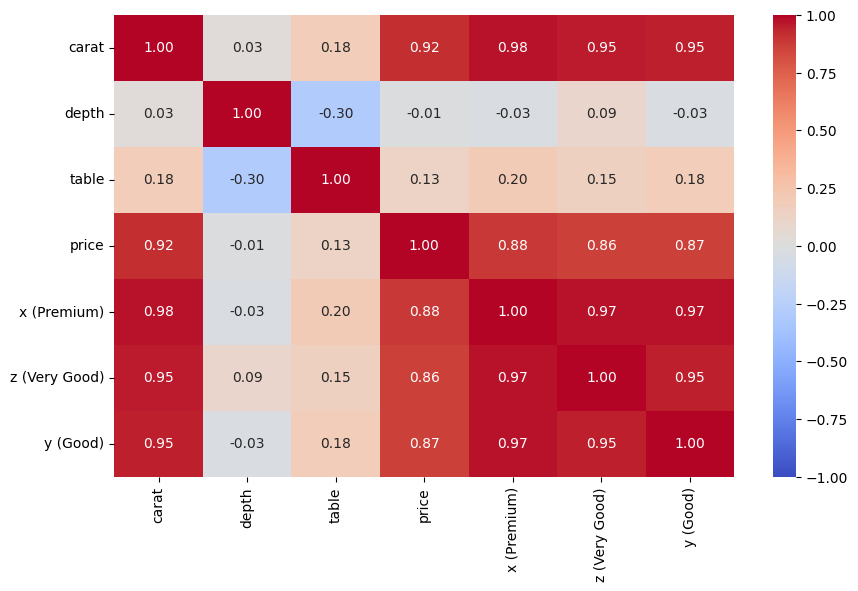

In [37]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()


corr = data[numerical_col].corr()
#print(corr)
# plot the heatmap

plt.figure(figsize=(10,6)) #(16,12))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        annot = True,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

### **Think about it**
- Are there missing values and outliers in the dataset? If yes, how can you treat them? 
- Can you think of different ways in which this can be done and when to treat these outliers or not?
- Can we create new features based on Missing values?

#### Treating Outliers

#### Filling missing values in numerical columns with median and mode in categorical variables

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set